In [1]:
from keras.models import Sequential
from keras.layers import Dense

# optimizer: change the value of weight and biases: to looking for minimum cost
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [2]:
model = Sequential()

In [3]:
# units: how many output value
# input_shape: how many input value
# Dense: as its core do linear function, means if we dont apply any activation function, so it is linear activation function
model.add(Dense(units = 1, input_shape=(1,)))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

# here we have to 2 parameter, that is  "weight and bias"

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer = Adam(lr=0.8), loss='mean_squared_error')

In [6]:
import pandas as pd
df = pd.read_csv('weight-height.csv')

In [10]:
X = df[['Height']].values
y_true = df['Weight'].values
y_true.shape

(10000,)

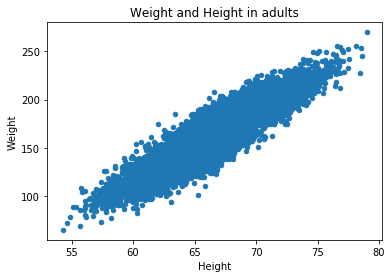

In [27]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

In [28]:
# find value w and b, to have minimum loss
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s 47us/step - loss: 928.6488
Epoch 2/40
10000/10000 [==============================] - 0s 30us/step - loss: 564.7789
Epoch 3/40
10000/10000 [==============================] - 0s 34us/step - loss: 514.3138
Epoch 4/40
10000/10000 [==============================] - 0s 34us/step - loss: 467.9105
Epoch 5/40
10000/10000 [==============================] - 0s 36us/step - loss: 439.6936
Epoch 6/40
10000/10000 [==============================] - 0s 36us/step - loss: 374.5173
Epoch 7/40
10000/10000 [==============================] - 0s 37us/step - loss: 336.0512
Epoch 8/40
10000/10000 [==============================] - 0s 38us/step - loss: 307.7063
Epoch 9/40
10000/10000 [==============================] - 0s 28us/step - loss: 280.6280
Epoch 10/40
10000/10000 [==============================] - 0s 43us/step - loss: 285.4562
Epoch 11/40
10000/10000 [==============================] - 0s 50us/step - loss: 246.4297
Epoch 12/40
10000/10000 [=====

In [29]:
y_pred = model.predict(X)

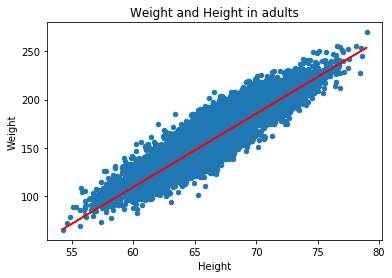

In [30]:
import  matplotlib.pyplot  as plt

df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [31]:
W, B = model.get_weights()

In [32]:
W

array([[7.6312966]], dtype=float32)

In [33]:
B

array([-348.81995], dtype=float32)

In [34]:
# Evaluating Model Performance
from sklearn.metrics import r2_score
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.841


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [36]:
# reset the weight to again train, detraining 

W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [37]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [38]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [39]:
from sklearn.metrics import mean_squared_error as mse

In [40]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	149.5
The Mean Squared Error on the Test set is:	149.1


In [41]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.855
The R2 score on the Test set is:	0.856


In [1]:
# congrats we are getting almost same R2 score on both the train and test datasets
# we are finished for this example